# An example of using Sentinel 2 data in GDBX notebooks
<br>Choosing an area using the DG imagery button</br>
Will automatically add the following code when you click the insert code for 1 image(s) button
<br></br>
## This example is for an AOI in Dover UK.


In [1]:
from gbdxtools.task import env
from gbdxtools import CatalogImage

bbox = env.inputs.get('bbox', '1.2840270996093752, 51.0832371168014, 1.4069366455078125, 51.14639813691828')

catalog_id1 = env.inputs.get('catalog_id1', 'e89d5a29-1119-5c0a-a007-a03341d5bc48')
image_id1 = CatalogImage(catalog_id1, bbox=map(float, bbox.split(",")))



## Plotting
<br> Add the following lines to display the image.</br>

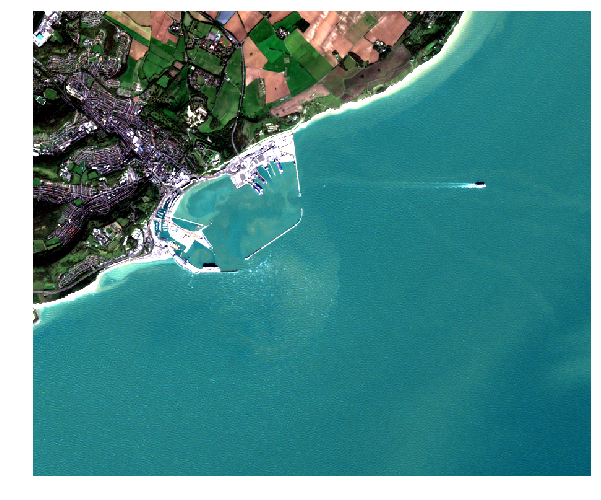

In [2]:
%matplotlib inline
image_id1.plot(w=10, h=10)

## What data have we got?
<br> Import numpy and have a look at the shape of the data </br>
<br> It will display that we have 4 bands as the default load appears to be the 10m sentinel 2 data</br>
<br> If you want the 20m resolution use</br>
<br> for example </br>
<br> </br>
<b>image_20m = CatalogImage(catalog_id1, band_type="MS", spec="20m", bbox=map(float, bbox.split(",")))</b>


In [3]:
import numpy as np
print (image_id1.shape)

(4, 752, 902)


## Get the first band in the data
<br> we will work with this</br>

In [4]:
## get the first band
band1 = image_id1[0,:,:]
print (band1.shape)

(752, 902)


## Plot it
<br> import matplotlib and adjust the figure size as needed</br>

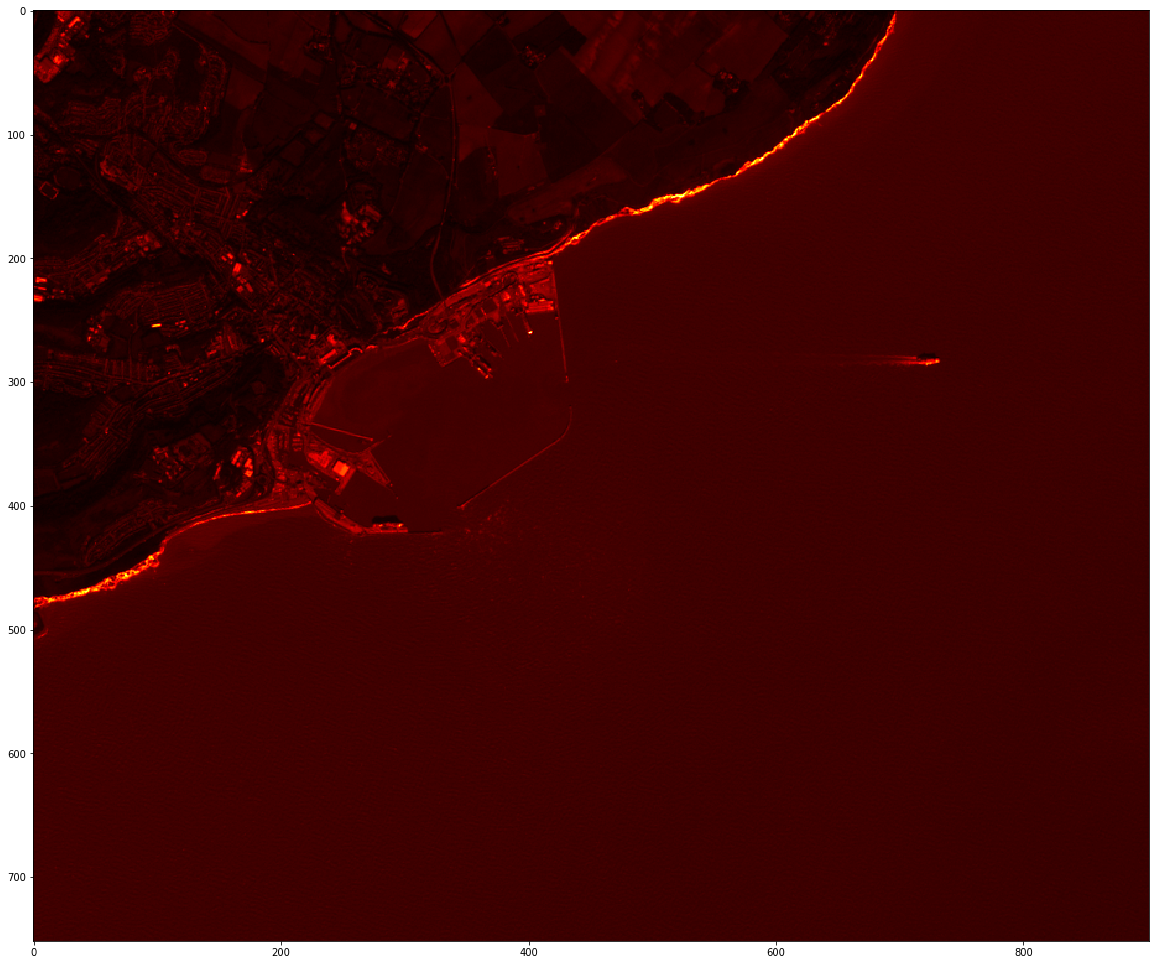

In [5]:
## plot it
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(band1,cmap='hot')

## Unsupervised cluster analysis on this data
<br> learn more about this here</br>
http://www.acgeospatial.co.uk/k-means-sentinel-2-python/

In [6]:
!pip install sklearn ### to install sklearn
from sklearn import cluster


X = band1.reshape((-1,1))
print (X.shape)


k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_
X_cluster = X_cluster.reshape(band1.shape)

vcrpy 1.13.0 requires yarl, which is not installed.
twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
gbdxtools 0.15.12 requires mock, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
(678304, 1)


## Plot it

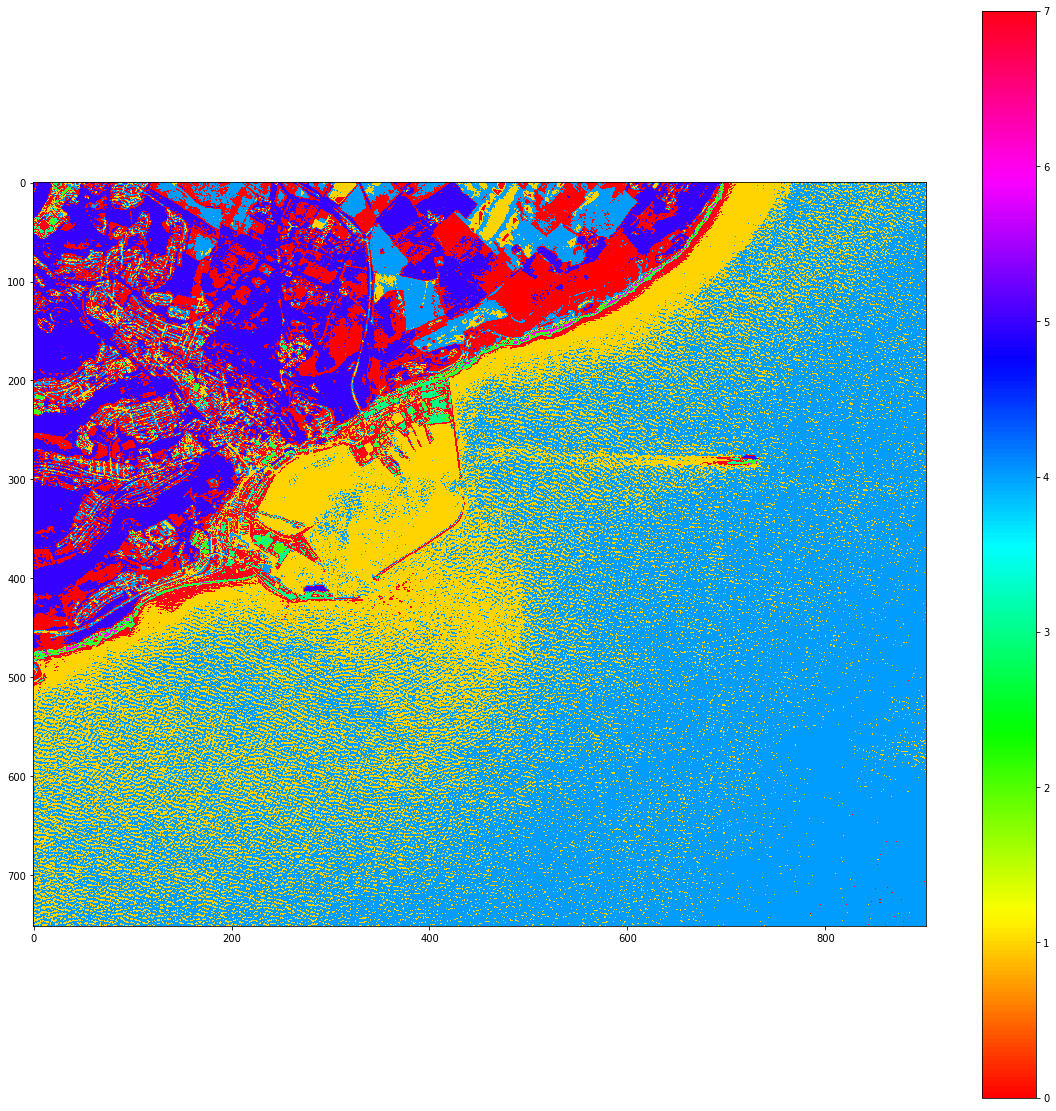

In [7]:
plt.figure(figsize=(20,20))
plt.imshow(X_cluster, cmap="hsv")
plt.colorbar()
plt.show()

## Mask it
<br> this result is dependant upon the result above</br>
<br> we are converting every class that equals 7 to value 1</br>
<br> and everything else to 0 </br>
<br> you could use this as the basis for extraction, or masking</br>


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


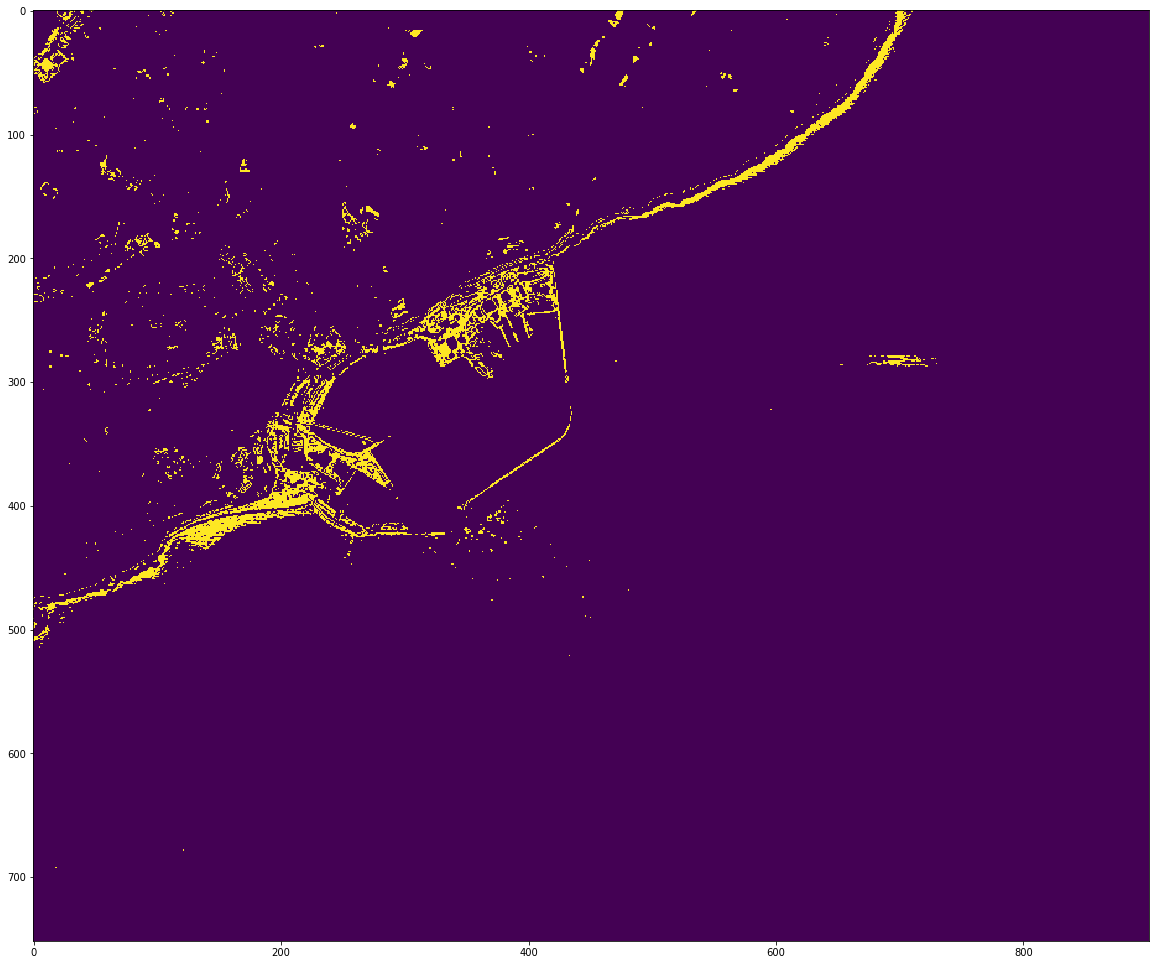

In [8]:
temp = np.less(X_cluster, 7)
np.putmask(X_cluster, temp, 0)
temp = np.greater_equal(X_cluster, 7)
np.putmask(X_cluster, temp, 1)

print (X_cluster)

plt.figure(figsize=(20,20))
plt.imshow(X_cluster)

plt.show()

## Next steps
<br> You might want to smooth this result </br>
<br> You might wish to extract all the clusters that equal class 7 </br>